In [27]:
#import stuff#
import pandas as pd


In [28]:

file_path = "US_Accidents_March23.csv"  # Adjust filename if needed
output_file = "US_Accidents_100K.csv"

# Define chunk size and sample fraction
chunk_size = 50000  # Read in chunks
sample_fraction = 100000 / 7700000  # 100K out of 7.7M rows

# Initialize an empty list to store sampled data
sampled_chunks = []

# Read in chunks and sample
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    sampled_chunk = chunk.sample(frac=sample_fraction, random_state=42)  # Randomly sample from each chunk
    sampled_chunks.append(sampled_chunk)  # Store the sample

# Combine all sampled chunks
df_sample = pd.concat(sampled_chunks)

# Save to CSV
df_sample.to_csv(output_file, index=False)

print(f"Saved {len(df_sample)} random rows to {output_file}")


Saved 100315 random rows to US_Accidents_100K.csv


In [29]:

# Load the sampled dataset
df = pd.read_csv("US_Accidents_100K.csv")

# Check basic info
print(df.info())  # Overview of data types & missing values
print(df.head())  # Preview first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100315 entries, 0 to 100314
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100315 non-null  object 
 1   Source                 100315 non-null  object 
 2   Severity               100315 non-null  int64  
 3   Start_Time             100315 non-null  object 
 4   End_Time               100315 non-null  object 
 5   Start_Lat              100315 non-null  float64
 6   Start_Lng              100315 non-null  float64
 7   End_Lat                56150 non-null   float64
 8   End_Lng                56150 non-null   float64
 9   Distance(mi)           100315 non-null  float64
 10  Description            100315 non-null  object 
 11  Street                 100174 non-null  object 
 12  City                   100310 non-null  object 
 13  County                 100315 non-null  object 
 14  State                  100315 non-nu

In [30]:
#Data Cleaning - Missing values#

# Count missing values in each column
print(df.isnull().sum())

# Fill missing numerical values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with the most common category
df.fillna(df.mode().iloc[0], inplace=True)

#check again for missing values
print(df.isnull().sum())

ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                  44165
End_Lng                  44165
Distance(mi)                 0
Description                  0
Street                     141
City                         5
County                       0
State                        0
Zipcode                     25
Country                      0
Timezone                   110
Airport_Code               280
Weather_Timestamp         1545
Temperature(F)            2129
Wind_Chill(F)            25954
Humidity(%)               2253
Pressure(in)              1818
Visibility(mi)            2267
Wind_Direction            2231
Wind_Speed(mph)           7432
Precipitation(in)        28612
Weather_Condition         2215
Amenity                      0
Bump                         0
Crossing                     0
Give_Way

In [43]:
#Data Cleaning- Drop Unnecessary Columns#

# Drop columns that are not useful
df.drop(columns=[
    "ID",  # Unique ID (useless for ML)
    "Source",  # Just tells where the data came from
    "End_Time",  # Not useful, we already have Start_Time
    "Country",  # All accidents are in the US
    "Description",  # Text data, too complex for clustering
    "Weather_Timestamp",  # Too detailed, not useful
    "Turning_Loop",  # Always NaN or rarely used
], inplace=True, errors="ignore")


print("Remaining Columns After Dropping Unnecessary Ones:")

print(df.columns)

print(df)


Remaining Columns After Dropping Unnecessary Ones:
Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Street', 'Zipcode', 'Airport_Code', 'Temperature(F)',
       ...
       'Weather_Condition_T-Storm / Windy', 'Weather_Condition_Thunder',
       'Weather_Condition_Thunder / Windy',
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Thunderstorm',
       'Weather_Condition_Thunderstorms and Rain',
       'Weather_Condition_Thunderstorms and Snow',
       'Weather_Condition_Widespread Dust', 'Weather_Condition_Wintry Mix',
       'Weather_Condition_Wintry Mix / Windy'],
      dtype='object', length=156)
        Severity  Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0              2  38.507385 -122.719521  36.178995  -87.989066         0.000   
1              2  38.645298 -121.397606  36.178995  -87.989066         0.010   
2              2  39.791660  -84.169342  36.178995  -87.989066         0.000   
3  

In [44]:
#Data Cleaning - dropping overlapping and redundant columns#

df.drop(columns=[
    "Start_Time",      # Too detailed, and conversion is tricky
    "End_Time",        # Already dropped before
    "City",            # Redundant with County/State
    "County",          # We already have State
    "Timezone",        # Not critical for clustering
    "Wind_Direction",  # Hard to interpret in clustering
    "Civil_Twilight",   # Too specific
    "Nautical_Twilight",  # Too specific
    "Astronomical_Twilight",  # Too specific
    "Sunrise_Sunset",  # Overlaps with weather data
], inplace=True, errors="ignore")


print("Remaining Columns After Dropping Overlapping/Redundant Ones:")

print(df.columns)

print(df)


Remaining Columns After Dropping Overlapping/Redundant Ones:
Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Street', 'Zipcode', 'Airport_Code', 'Temperature(F)',
       ...
       'Weather_Condition_T-Storm / Windy', 'Weather_Condition_Thunder',
       'Weather_Condition_Thunder / Windy',
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Thunderstorm',
       'Weather_Condition_Thunderstorms and Rain',
       'Weather_Condition_Thunderstorms and Snow',
       'Weather_Condition_Widespread Dust', 'Weather_Condition_Wintry Mix',
       'Weather_Condition_Wintry Mix / Windy'],
      dtype='object', length=156)
        Severity  Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0              2  38.507385 -122.719521  36.178995  -87.989066         0.000   
1              2  38.645298 -121.397606  36.178995  -87.989066         0.010   
2              2  39.791660  -84.169342  36.178995  -87.989066         0.

In [48]:
df.drop(columns=[
    "Street", "Zipcode", "Airport_Code",  # Location-based but too detailed
    "End_Lat", "End_Lng",  # Redundant with Start_Lat & Start_Lng
], inplace=True, errors="ignore")

print("Remaining Columns After Dropping Overlapping/Redundant Ones:")

print(df.columns)

print(df)


Remaining Columns After Dropping Overlapping/Redundant Ones:
Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)',
       ...
       'Weather_Condition_T-Storm / Windy', 'Weather_Condition_Thunder',
       'Weather_Condition_Thunder / Windy',
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Thunderstorm',
       'Weather_Condition_Thunderstorms and Rain',
       'Weather_Condition_Thunderstorms and Snow',
       'Weather_Condition_Widespread Dust', 'Weather_Condition_Wintry Mix',
       'Weather_Condition_Wintry Mix / Windy'],
      dtype='object', length=151)
        Severity  Start_Lat   Start_Lng  Distance(mi)  Temperature(F)  \
0              2  38.507385 -122.719521         0.000            63.0   
1              2  38.645298 -121.397606         0.010            48.2   
2              2  39.791660  -84.169342         0.000        

In [50]:
print("Final Column Count:", len(df.columns))
print(df.info())
print(df.head())
print(df.describe())

Final Column Count: 151
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100315 entries, 0 to 100314
Columns: 151 entries, Severity to Weather_Condition_Wintry Mix / Windy
dtypes: bool(140), float64(10), int64(1)
memory usage: 21.8 MB
None
   Severity  Start_Lat   Start_Lng  Distance(mi)  Temperature(F)  \
0         2  38.507385 -122.719521          0.00            63.0   
1         2  38.645298 -121.397606          0.01            48.2   
2         2  39.791660  -84.169342          0.00            31.1   
3         2  38.028275 -121.939743          0.00            48.0   
4         2  37.377357 -121.945442          0.01            60.1   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
0           62.0         67.0         29.93            10.0             13.8   
1           62.0         93.0         29.97             3.0             21.9   
2           25.4         88.0         29.86             6.0              5.8   
3           62.0         71.0 

In [ ]:
#data cleaning - dropping specific weather conditions#

df.drop(columns=[col for col in df.columns if "Weather_Condition" in col], inplace=True)
print("Dropped all Weather Condition columns! New column count:", len(df.columns))




Dropped all Weather Condition columns! New column count: 71


In [54]:
#data cleaning - further dropping#

df.drop(columns=["State", "County", "Zipcode"], inplace=True, errors="ignore")

df.drop(columns=["End_Lat", "End_Lng"], inplace=True, errors="ignore")


print(len(df.columns))

71


In [56]:
print(df.info())
print(df.describe())
print(df.head())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100315 entries, 0 to 100314
Data columns (total 71 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           100315 non-null  int64  
 1   Start_Lat          100315 non-null  float64
 2   Start_Lng          100315 non-null  float64
 3   Distance(mi)       100315 non-null  float64
 4   Temperature(F)     100315 non-null  float64
 5   Wind_Chill(F)      100315 non-null  float64
 6   Humidity(%)        100315 non-null  float64
 7   Pressure(in)       100315 non-null  float64
 8   Visibility(mi)     100315 non-null  float64
 9   Wind_Speed(mph)    100315 non-null  float64
 10  Precipitation(in)  100315 non-null  float64
 11  Amenity            100315 non-null  bool   
 12  Bump               100315 non-null  bool   
 13  Crossing           100315 non-null  bool   
 14  Give_Way           100315 non-null  bool   
 15  Junction           100315 non-null  bool   
 16  No

In [57]:
# data cleaning - dropping states#
#since we have geographical info through Start_Lat, Start_Lng
#we remove all states

df.drop(columns=[col for col in df.columns if col.startswith("State_")], inplace=True)
print("Dropped all State columns! New column count:", len(df.columns))



Dropped all State columns! New column count: 23


In [58]:
print("Final Column Count:", len(df.columns))
print(df.info())
print(df.describe())
print(df.head())


Final Column Count: 23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100315 entries, 0 to 100314
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           100315 non-null  int64  
 1   Start_Lat          100315 non-null  float64
 2   Start_Lng          100315 non-null  float64
 3   Distance(mi)       100315 non-null  float64
 4   Temperature(F)     100315 non-null  float64
 5   Wind_Chill(F)      100315 non-null  float64
 6   Humidity(%)        100315 non-null  float64
 7   Pressure(in)       100315 non-null  float64
 8   Visibility(mi)     100315 non-null  float64
 9   Wind_Speed(mph)    100315 non-null  float64
 10  Precipitation(in)  100315 non-null  float64
 11  Amenity            100315 non-null  bool   
 12  Bump               100315 non-null  bool   
 13  Crossing           100315 non-null  bool   
 14  Give_Way           100315 non-null  bool   
 15  Junction           100315 no

In [62]:
#data cleaning - making everything numeric#
# Convert boolean columns to integers (0/1)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

print("Boolean features converted to 0/1!")
print(df.info())



Boolean features converted to 0/1!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100315 entries, 0 to 100314
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           100315 non-null  int64  
 1   Start_Lat          100315 non-null  float64
 2   Start_Lng          100315 non-null  float64
 3   Distance(mi)       100315 non-null  float64
 4   Temperature(F)     100315 non-null  float64
 5   Wind_Chill(F)      100315 non-null  float64
 6   Humidity(%)        100315 non-null  float64
 7   Pressure(in)       100315 non-null  float64
 8   Visibility(mi)     100315 non-null  float64
 9   Wind_Speed(mph)    100315 non-null  float64
 10  Precipitation(in)  100315 non-null  float64
 11  Amenity            100315 non-null  int64  
 12  Bump               100315 non-null  int64  
 13  Crossing           100315 non-null  int64  
 14  Give_Way           100315 non-null  int64  
 15  Junction        

In [66]:
#data cleaning - making everything in the same scale#

from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding Severity)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop("Severity")

# Apply StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Feature scaling complete!")
print(df.head())


Feature scaling complete!
   Severity  Start_Lat  Start_Lng  Distance(mi)  Temperature(F)  \
0         2   0.456178  -1.611913     -0.324765        0.066649   
1         2   0.483458  -1.535875     -0.319010       -0.721215   
2         2   0.710222   0.605543     -0.324765       -1.631518   
3         2   0.361404  -1.567059     -0.324765       -0.731862   
4         2   0.232645  -1.567387     -0.319010       -0.087730   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
0       0.141154     0.093799      0.388316        0.336304         1.200647   
1       0.141154     1.246037      0.428488       -2.307935         2.782623   
2      -1.753505     1.024453      0.318014       -1.174690        -0.361797   
3       0.141154     0.271066      0.538963        0.336304        -0.146961   
4       0.141154    -0.127785      0.508834        0.336304         1.200647   

   ...  Crossing  Give_Way  Junction  No_Exit   Railway  Roundabout   Station  \
0  ... -0

            Severity     Start_Lat     Start_Lng  Distance(mi)  \
count  100315.000000  1.003150e+05  1.003150e+05  1.003150e+05   
mean        2.209291 -1.133298e-17 -2.549922e-17 -5.949817e-18   
std         0.485150  1.000005e+00  1.000005e+00  1.000005e+00   
min         1.000000 -2.300539e+00 -1.713703e+00 -3.247649e-01   
25%         2.000000 -5.508417e-01 -1.294859e+00 -3.247649e-01   
50%         2.000000 -7.423878e-02  3.997615e-01 -3.075006e-01   
75%         2.000000  7.640733e-01  8.245947e-01 -6.004444e-02   
max         4.000000  2.527589e+00  1.544842e+00  5.747177e+01   

       Temperature(F)  Wind_Chill(F)   Humidity(%)  Pressure(in)  \
count    1.003150e+05   1.003150e+05  1.003150e+05  1.003150e+05   
mean    -1.133298e-18  -1.246628e-17 -1.501620e-17 -1.133298e-18   
std      1.000005e+00   1.000005e+00  1.000005e+00  1.000005e+00   
min     -5.150289e+00  -5.837892e+00 -2.831113e+00 -1.005656e+01   
25%     -6.253940e-01  -3.765128e-01 -7.039043e-01 -1.640574e-01 

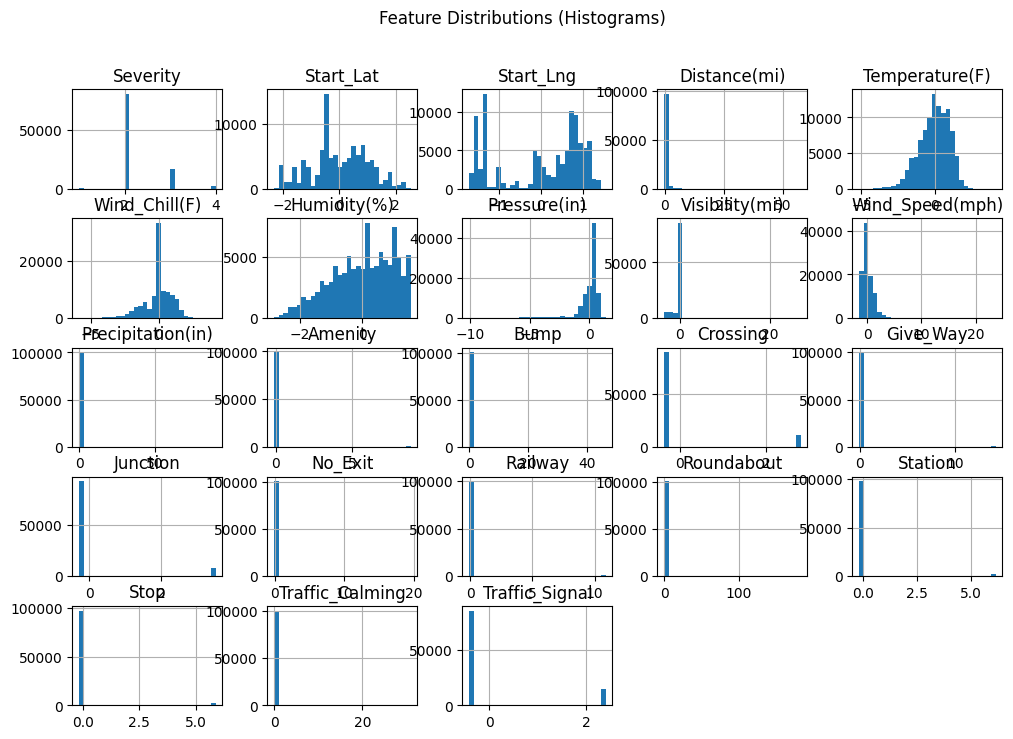

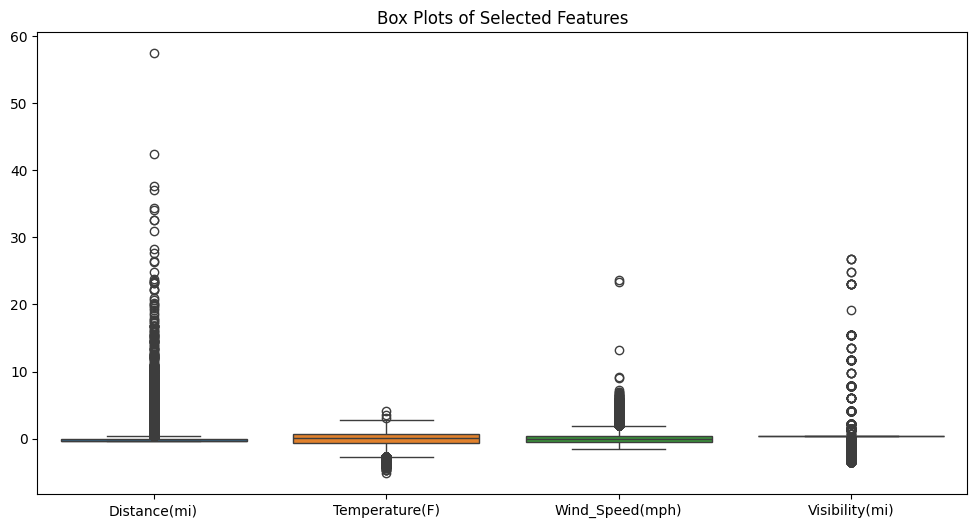

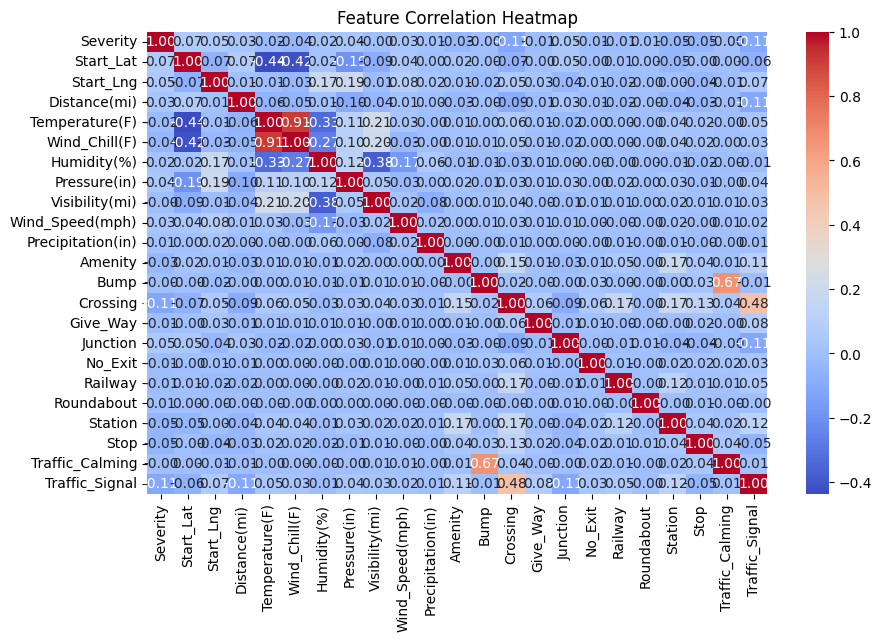

In [70]:
#data stats#

# Basic statistics for numerical features
print(df.describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for key features
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions (Histograms)")
plt.show()

#outiers detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Distance(mi)', 'Temperature(F)', 'Wind_Speed(mph)', 'Visibility(mi)']])
plt.title("Box Plots of Selected Features")
plt.show()

#corellation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


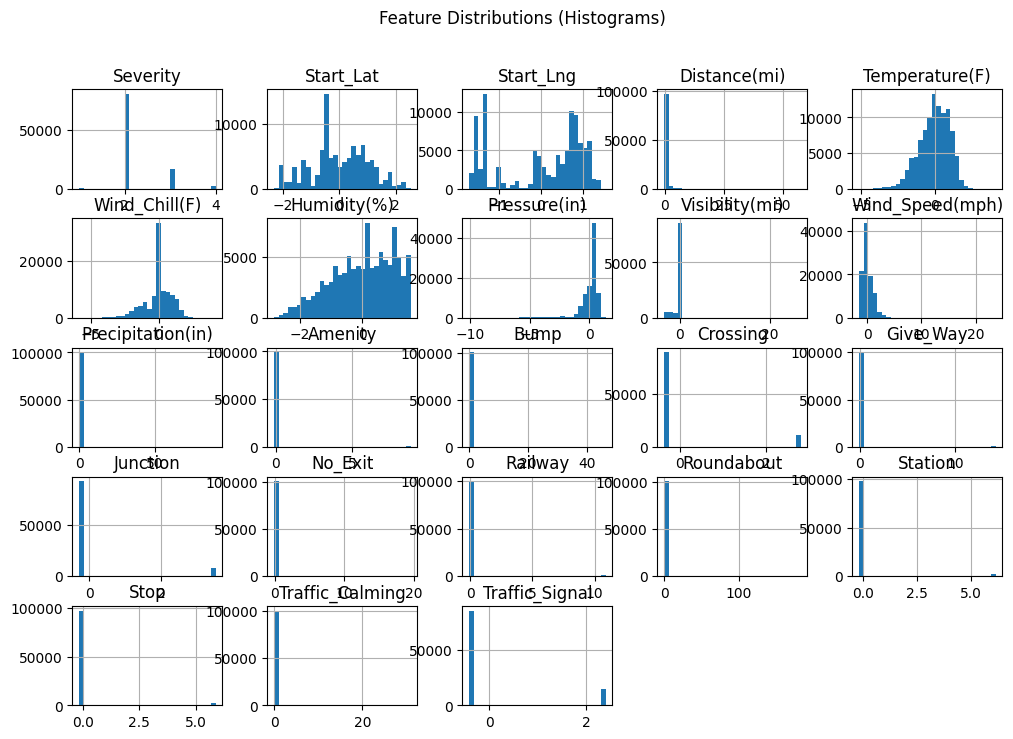

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for key features
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions (Histograms)")
plt.show()


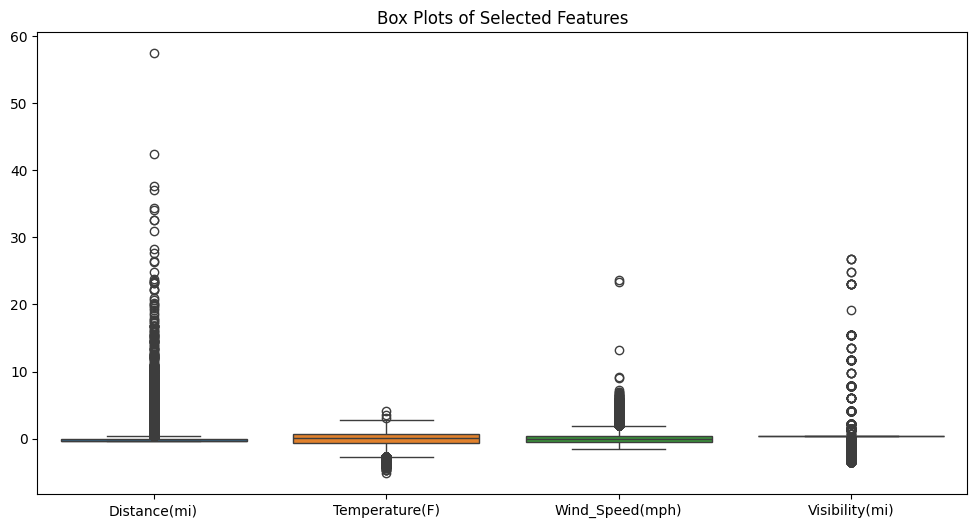

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Distance(mi)', 'Temperature(F)', 'Wind_Speed(mph)', 'Visibility(mi)']])
plt.title("Box Plots of Selected Features")
plt.show()


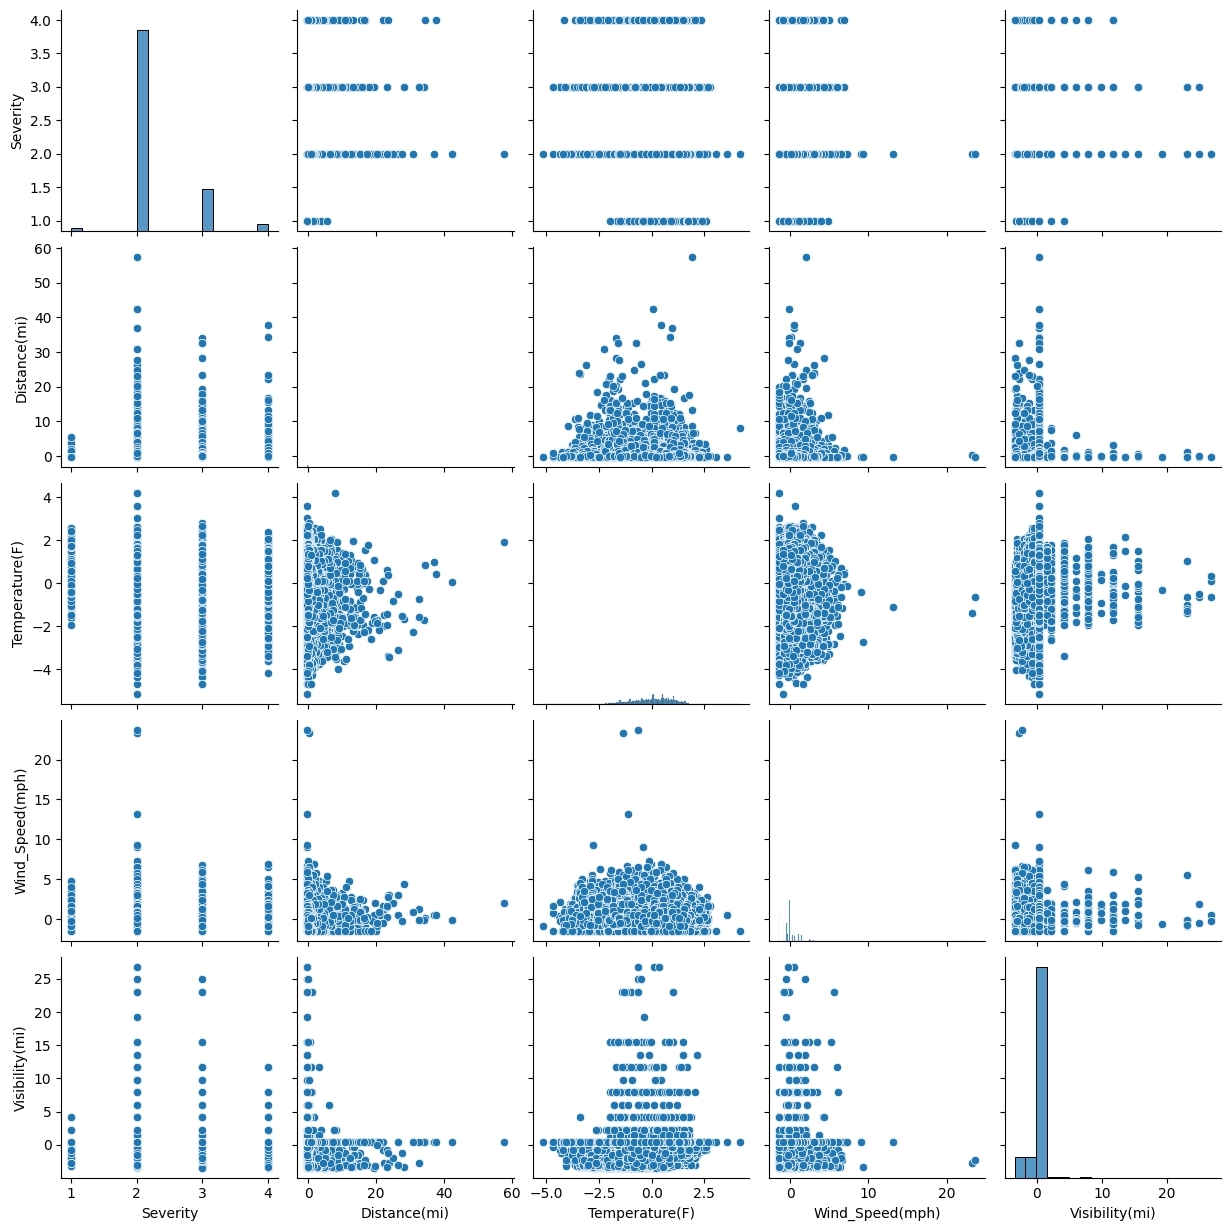

In [73]:
sns.pairplot(df[['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Speed(mph)', 'Visibility(mi)']])
plt.show()


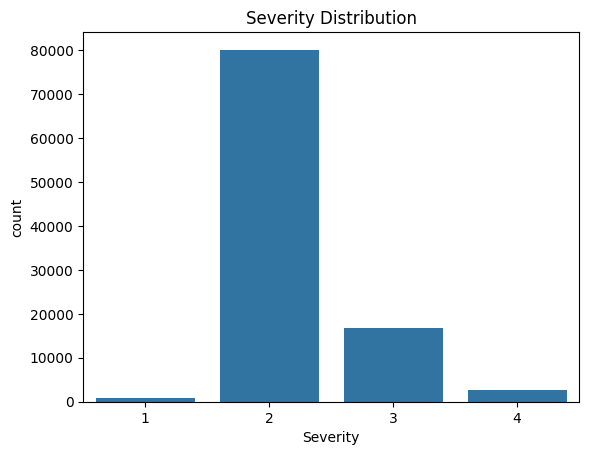

In [74]:
sns.countplot(x=df["Severity"])
plt.title("Severity Distribution")
plt.show()


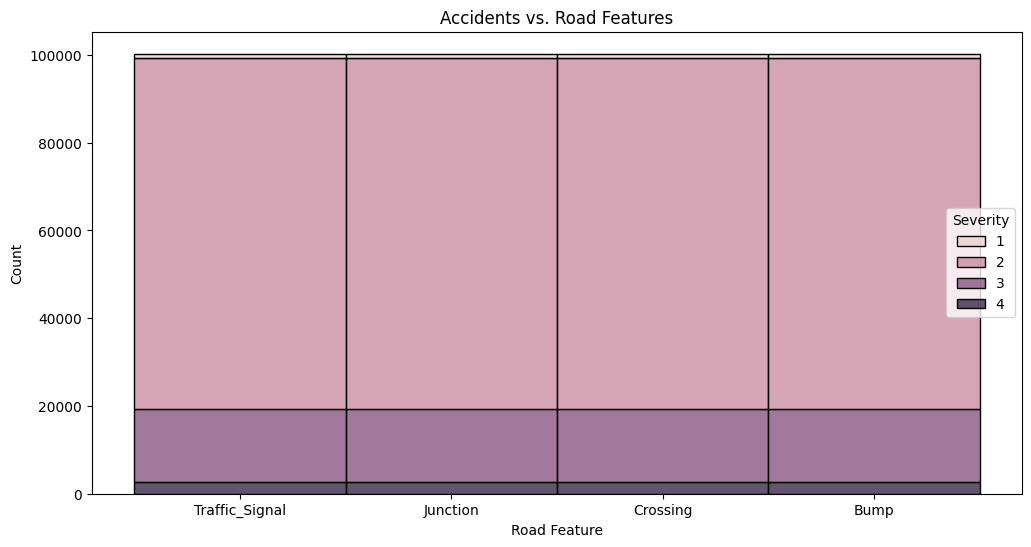

In [83]:
road_features = ["Traffic_Signal", "Junction", "Crossing", "Bump"]

df_melted = df.melt(id_vars=["Severity"], value_vars=road_features, var_name="Road Feature", value_name="Presence")

plt.figure(figsize=(12, 6))
sns.histplot(df_melted, x="Road Feature", hue="Severity", multiple="stack", discrete=True)
plt.title("Accidents vs. Road Features")
plt.show()


In [87]:
df
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100315 entries, 0 to 100314
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           100315 non-null  int64  
 1   Start_Lat          100315 non-null  float64
 2   Start_Lng          100315 non-null  float64
 3   Distance(mi)       100315 non-null  float64
 4   Temperature(F)     100315 non-null  float64
 5   Wind_Chill(F)      100315 non-null  float64
 6   Humidity(%)        100315 non-null  float64
 7   Pressure(in)       100315 non-null  float64
 8   Visibility(mi)     100315 non-null  float64
 9   Wind_Speed(mph)    100315 non-null  float64
 10  Precipitation(in)  100315 non-null  float64
 11  Amenity            100315 non-null  float64
 12  Bump               100315 non-null  float64
 13  Crossing           100315 non-null  float64
 14  Give_Way           100315 non-null  float64
 15  Junction           100315 non-null  float64
 16  No

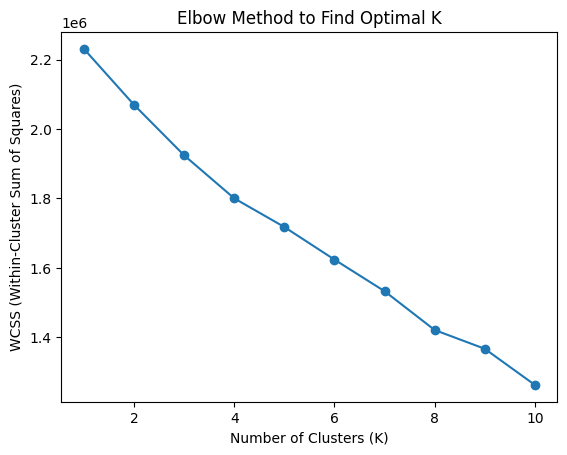

In [ ]:
#Clustering step- use elbow rule to find the optimal k #

df_clustering=df
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Find the best K using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Try K from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)  # Store WCSS for each K

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Find Optimal K')
plt.show()



In [102]:
#clustering step - applying k-means#
optimal_k = 3  # Adjust based on Elbow Method result


# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clustering["Cluster_KMeans"] = kmeans.fit_predict(df_clustering)

# Check the cluster distribution
print(df_clustering["Cluster_KMeans"].value_counts())


Cluster_KMeans
2    58671
1    29594
0    12050
Name: count, dtype: int64


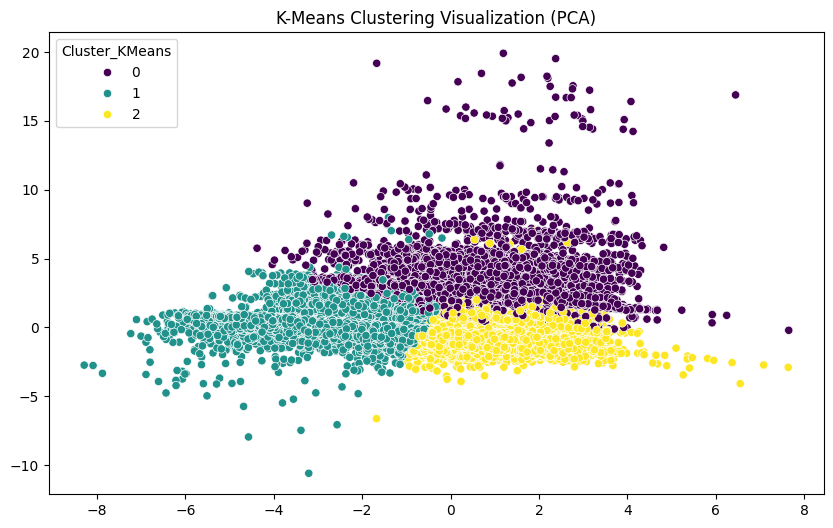

In [103]:
#clustering step - visualizing k-means clusters --> PCA scatter plot
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clustering.drop(columns=["Cluster_KMeans"]))

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_clustering["Cluster_KMeans"], palette="viridis")
plt.title("K-Means Clustering Visualization (PCA)")
plt.show()


In [105]:
#clustering- trying every k for silloete score#

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = {}  # Store scores for each K

for k in range(2, 10):  # Test K from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_clustering)
    
    # Calculate silhouette score
    score = silhouette_score(df_clustering, cluster_labels)
    silhouette_scores[k] = score
    print(f"K={k}, Silhouette Score: {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K Values")
plt.show()



K=2, Silhouette Score: 0.1646
K=3, Silhouette Score: 0.1565
K=4, Silhouette Score: 0.1598
K=5, Silhouette Score: 0.1705
K=6, Silhouette Score: 0.1647
K=7, Silhouette Score: 0.0961


KeyboardInterrupt: 